# **Big Data Analytics [CN7031] CRWK 2022-23**
# **Group ID: [103]**
1.   Student 1: Lakshmi Soundarya Chakka and u2301563
2.   Student 2: Ganesh Raj Lingumgunta and u2278208
3.   Student 3: Sainath Linga and u2334500
4.   Student 4: Guru Venkata Pavan Kumar Sabniveesu and u2266286

---


If you want to add comments on your group work, please write it here for us:


# **Initiate and Configure Spark**

---


In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 199 kB 49.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e25603bb2728a800bb371cfd5d6b32c73c64ef33f3fae3a4afa032956b895364
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
!pip install numpy==1.19.2
!pip install matplotlib==3.1.1
!pip install seaborn==0.10.1
!pip install pandas==1.0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.5 MB 7.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.2 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.2 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.2 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.2 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.8 MB 151 kB/s 
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152035 sha256=65224605d252256149d99e251d2f902d4dd30b80cf8409021b492d89afc97bc5
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 215 kB 7.1 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.0 MB 9.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 1.0.5 which is incompatible.
plotnine 0.8.0 requires pandas>=1.1.0, but you have pandas 1.0.5 which is incompatible.
mizani 0.7.3 requires pandas

In [ ]:
########## ONLY in Ubuntu Machine ##########
# Load Spark engine
!pip3 install -q findspark
import findspark
findspark.init()
########## ONLY in Ubuntu Machine ##########

In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('Group-103').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"

In [ ]:
#importing all PYSPARK classes
from functools import reduce
from pyspark.sql import DataFrame
import numpy as numpy
from pyspark.sql import functions as replaceSpace
import os
import findspark
import seaborn as sns
import pandas as pd
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
from pyspark.ml.classification import LinearSVC
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from pyspark.ml.regression import LinearRegression 
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.stat import Statistics
from pyspark.ml.stat import ChiSquareTest


# **Load Data**

---


In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")
########## ONLY in Colab ##########

In [ ]:
# Load Data from Ubuntu VMware:

########## ONLY in Ubuntu Machine ##########
IDS_df = spark.read.option("header", "true").csv("IDS2018/*.csv")
########## ONLY in Ubuntu Machine ##########

In [ ]:
# Print DF to make sure it is working
IDS_df= IDS_df.select([replaceSpace.col(column).alias(column.replace(' ', '')) for column in IDS_df.columns])
IDS_df.replace(-numpy.Inf, 0)
IDS_df.show()

+-------+--------+-------------------+------------+----------+----------+-------------+-------------+------------+------------+-------------+--------------+------------+------------+--------------+--------------+---------------+-------------+----------------+----------------+----------+----------+---------+----------------+----------------+---------+---------+---------+----------------+----------------+---------+---------+-----------+-----------+-----------+-----------+------------+------------+-------------+------------+---------+---------+--------------+--------------+----------------+----------+----------+----------+----------+----------+----------+------------+----------+------------+--------------+-------------+--------------+------------+------------+-------------+------------+------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+----------+---------+---------+---------+----------+--------

In [ ]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|5329908|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+




# **Task 1: Spark SQL [30 marks]**

---



/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------+--------------------+-----------+
|Protocol|          DDOSattack|attackcount|
+--------+--------------------+-----------+
|       6|              Benign|    2554474|
|      17|              Benign|    1303696|
|       6|    DDOS attack-HOIC|     163750|
|       6|                 Bot|     142183|
|       6|      SSH-Bruteforce|      93818|
|       6|DoS attacks-Golde...|      27772|
|       6|    DoS attacks-Hulk|      25548|
|       6|DoS attacks-Slowl...|       8584|
|       6|    Brute Force -Web|        266|
|       6|    Brute Force -XSS|        112|
|       6|       SQL Injection|         48|
|      17|    Brute Force -Web|          2|
|      17|    Brute Force -XSS|          1|
+--------+--------------------+-----------+



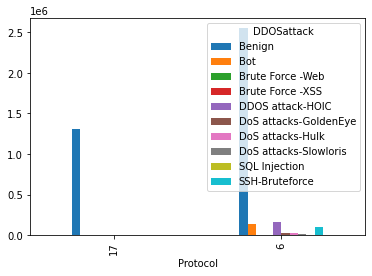

In [ ]:
# Student 1 Lakshmi Soundarya Chakka and u2301563

# Query 1 [Briefly explain]:finding different attack on various protocols where packets size > 0 and group , order by attack type and count from the view CIC

spark_context = SQLContext(spark)
IDS_df.createOrReplaceTempView("CIC")
sqlQuery = spark_context.sql("""
                           SELECT Protocol,Label as DDOSattack,
                           COUNT(*) as attackcount 
                           FROM CIC 
                           WHERE FwdSegSizeMin>0
                           AND Label!='Label' AND TotFwdPkts>0 AND TotBwdPkts>0
                           AND TotLenFwdPkts>0
                           GROUP BY Protocol,DDOSattack
                           ORDER BY attackcount DESC
                           """)
sqlQuery.show()
output = pd.DataFrame(sqlQuery.toPandas())
output.pivot("Protocol", "DDOSattack", "attackcount").plot(kind='bar')
plt.show()

+-------+--------------------+-----------+
|dstport|          DDOSattack|attackcount|
+-------+--------------------+-----------+
|     53|              Benign|    1294650|
|   3389|              Benign|     650129|
|    443|              Benign|     449501|
|     80|              Benign|     431644|
|     80|    DDOS attack-HOIC|     163750|
|   8080|                 Bot|     137947|
|    445|              Benign|     133263|
|     22|      SSH-Bruteforce|      93818|
|     80|DoS attacks-Golde...|      27772|
|     80|    DoS attacks-Hulk|      25548|
|     80|DoS attacks-Slowl...|       8584|
|     67|              Benign|       4267|
|    137|              Benign|       1809|
|    123|              Benign|        970|
|    135|              Benign|        735|
|     22|              Benign|        470|
|     80|    Brute Force -Web|        264|
|    139|              Benign|        251|
|     80|    Brute Force -XSS|        112|
|  50454|              Benign|        104|
+-------+--

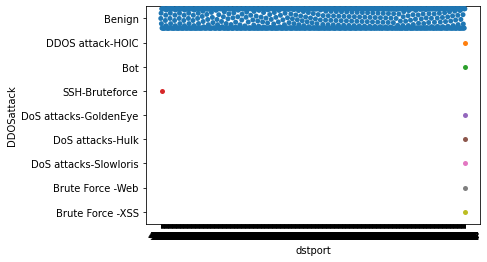

In [ ]:
# Student 1 Lakshmi Soundarya Chakka and u2301563
# Query 2 [Briefly explain]:In this query we are finding number of attacks on various destination ports where packets size>0 and order and group by destination port and ddos attack

sqlQuery = spark_context.sql("""
                           SELECT distinct(DstPort) as dstport,
                           Label as DDOSattack,
                           COUNT(*) as attackcount 
                           FROM CIC 
                           WHERE FwdSegSizeMin>0
                           AND Label!='Label' AND TotFwdPkts>0 AND TotBwdPkts>0
                           AND TotLenFwdPkts>0
                           GROUP BY dstport, DDOSattack
                           ORDER BY attackcount DESC
                           LIMIT 1000
                           """)                          
                           
sqlQuery.show()
output = pd.DataFrame(sqlQuery.toPandas())
sns.swarmplot(x="dstport", y="DDOSattack", data=output)
plt.show()

In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
# Query 1 [Briefly explain]: In this query we are finding number of ddos attack  where average packets size > 50 and  group by Label 



sqlQuery = spark_context.sql("""
                           SELECT * from (SELECT DISTINCT(Label),AVG(PktSizeAvg) as avgPaketSize,AVG(FwdSegSizeAvg) as fwdpktsize,AVG(BwdSegSizeAvg) as bwdpktsize
                           FROM CIC
                            GROUP BY Label)  where avgPaketSize > 50
                           """)
sqlQuery.show()

+--------------------+------------------+------------------+------------------+
|               Label|      avgPaketSize|        fwdpktsize|        bwdpktsize|
+--------------------+------------------+------------------+------------------+
|      SSH-Bruteforce| 52.62246448989576| 43.20171094614463| 62.69196750828345|
|              Benign|105.24899659274708| 68.21151890747821|124.55510610959129|
|DoS attacks-Slowl...| 67.61225864524836| 79.31495027115912|3.3335759781619654|
|DoS attacks-Golde...|110.36075112285621| 71.69475682053117|158.70079583053322|
|       SQL Injection|169.49332704000807| 81.93025327163333| 294.2808690351793|
|    Brute Force -XSS| 394.0684375907151|142.28641804508047|  868.866651702966|
|    Brute Force -Web| 260.4807586149985|213.93370313604655|181.60268957168535|
+--------------------+------------------+------------------+------------------+



In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
# Query 2 [Briefly explain]: here with this query we are finding out sum of forward and backward packets

sqlQuery = spark_context.sql("""
                           SELECT  SUBSTRING(Timestamp,1,10) as dateReceived, SUM(TotFwdPkts) As SumofForwordpackets, SUM(TotBwdPkts) as SumofBackwordpackets

                           FROM CIC GROUP BY dateReceived
                           """)
sqlQuery.show()

+------------+-------------------+--------------------+
|dateReceived|SumofForwordpackets|SumofBackwordpackets|
+------------+-------------------+--------------------+
|  05/01/1970|                2.0|                 0.0|
|  14/02/2018|          6507236.0|           7561475.0|
|  08/01/1970|                3.0|                 0.0|
|  12/01/1970|             1230.0|                 0.0|
|  15/02/2018|          5395962.0|           6731625.0|
|  16/02/2018|          3371652.0|           1735815.0|
|  21/02/2018|       2.06369954E8|           1373277.0|
|  10/01/1970|                9.0|                 0.0|
|  11/01/1970|               53.0|                 0.0|
|  22/02/2018|          6675123.0|           8624775.0|
|  23/02/2018|          7312156.0|         1.0409512E7|
|  02/03/2018|          6173248.0|           7322381.0|
+------------+-------------------+--------------------+



+--------------------+-------+--------+
|          ddosattack|ackflag|ackcount|
+--------------------+-------+--------+
|              Benign|      0| 3543063|
|      FTP-BruteForce|      0|  193360|
|    DDOS attack-HOIC|      0|  163750|
|                 Bot|      0|  143269|
|DoS attacks-SlowH...|      0|  139890|
|      SSH-Bruteforce|      0|   93848|
|DoS attacks-Golde...|      0|   26860|
|    DoS attacks-Hulk|      0|   15383|
|DoS attacks-Slowl...|      0|    7372|
|DDOS attack-LOIC-UDP|      0|    1730|
|    Brute Force -Web|      0|     418|
|    Brute Force -XSS|      0|     118|
|       SQL Injection|      0|      53|
+--------------------+-------+--------+



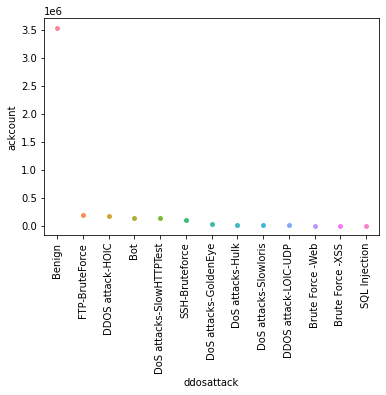

In [ ]:
# Student 3 Sainath Linga and u2334500
# Query 1 [Briefly explain]:In this query we are determining total packets with different attacks where ACKFlagCnt equals to 0

sqlQuery = spark_context.sql("""
                           SELECT distinct(Label) as ddosattack,
                           ACKFlagCnt as ackflag,
                           COUNT(*) as ackcount 
                           FROM CIC 
                           WHERE Label!='Label' AND ACKFlagCnt == 0
                           GROUP BY ddosattack, ackflag
                           ORDER BY ackcount DESC
                           LIMIT 10000
                           """)                         
                           
sqlQuery.show()
queryResult = pd.DataFrame(sqlQuery.toPandas())
sns.swarmplot(x="ddosattack", y="ackcount", data=queryResult)
plt.xticks(rotation=90)
plt.show()



+-------------------+------------+-------+------+--------+
|          timestamp|Flowduration|urgflag| Label|urgcount|
+-------------------+------------+-------+------+--------+
|02/03/2018 10:47:58|           9|      1|Benign|      53|
|22/02/2018 08:28:33|          10|      1|Benign|      51|
|22/02/2018 08:28:33|           9|      1|Benign|      47|
|02/03/2018 10:47:54|           9|      1|Benign|      37|
|22/02/2018 08:28:33|           7|      1|Benign|      37|
|22/02/2018 08:28:33|           8|      1|Benign|      35|
|02/03/2018 10:47:58|          10|      1|Benign|      34|
|02/03/2018 10:47:58|           8|      1|Benign|      32|
|15/02/2018 08:33:36|           9|      1|Benign|      29|
|15/02/2018 08:33:36|           8|      1|Benign|      27|
|15/02/2018 08:33:36|           7|      1|Benign|      27|
|22/02/2018 08:28:33|          11|      1|Benign|      25|
|15/02/2018 08:33:36|          10|      1|Benign|      23|
|02/03/2018 10:47:58|          11|      1|Benign|      2

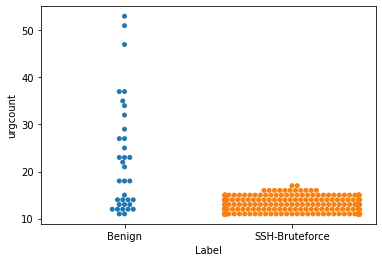

In [ ]:
# Student 3 Sainath Linga and u2334500
# Query 2 [Briefly explain]:here we are determining total timestamp with different attacks where URGFlagCnt equals to 1
sqlQuery = spark_context.sql("""
                           SELECT distinct(Timestamp) as timestamp,Flowduration,
                           URGFlagCnt as urgflag,Label,
                           COUNT(*) as urgcount 
                           FROM CIC 
                           WHERE Label!='Label' AND URGFlagCnt==1
                           GROUP BY timestamp,Flowduration,Label,urgflag
                           ORDER BY urgcount DESC
                           LIMIT 1000
                           """)
sqlQuery.show()
output = pd.DataFrame(sqlQuery.toPandas())
sns.swarmplot(x="Label", y="urgcount", data=output)
plt.show()

In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Query 1 [Briefly explain]:In this query we are finding out AVG of forward and backward packets details on different destination port numbers

sqlQuery = spark_context.sql("""
                           SELECT distinct(DstPort) as destport,
                           ROUND(AVG(FlowDuration)) as flowduration,
                           ROUND(AVG(TotFwdPkts)) as totforward_packets,
                           ROUND(AVG(TotBwdPkts)) as totbackward_packets,
                           ROUND(AVG(TotLenFwdPkts)) as totlength_forward_packet,
                           ROUND(AVG(TotLenBwdPkts)) as totlength_backward_packet,
                           ROUND(AVG(FwdPktLenMax)) as forwardpacket_len_max,
                           ROUND(AVG(FwdPktLenMin)) as forwardpacket_len_min,
                           ROUND(AVG(BwdPktLenMax)) as backwardpacket_len_max,
                           ROUND(AVG(BwdPktLenMin)) as forwardpacket_len_min
                           FROM CIC 
                           WHERE Label!='Label' 
                           GROUP BY destport
                           LIMIT 10000
                           """)                          
                           
sqlQuery.show()

+--------+------------+------------------+-------------------+------------------------+-------------------------+---------------------+---------------------+----------------------+---------------------+
|destport|flowduration|totforward_packets|totbackward_packets|totlength_forward_packet|totlength_backward_packet|forwardpacket_len_max|forwardpacket_len_min|backwardpacket_len_max|forwardpacket_len_min|
+--------+------------+------------------+-------------------+------------------------+-------------------------+---------------------+---------------------+----------------------+---------------------+
|   57868|   4759182.0|               5.0|                3.0|                   835.0|                    333.0|                813.0|                  0.0|                 289.0|                  0.0|
|   35640| 1.0064506E7|               5.0|                3.0|                   827.0|                    377.0|                780.0|                  0.0|                 294.0|        

In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Query 2 [Briefly explain]:In this query we are finding out minimum of forward and maximum of backward packets on different protocols
sqlQuery = spark_context.sql("""
                           SELECT distinct(Protocol) as protocol,
                           ROUND(AVG(FlowDuration)) as flow_duration,
                           ROUND(MIN(TotFwdPkts)) as totforward_packets,
                           ROUND(MAX(TotBwdPkts)) as totbackward_packets,
                           ROUND(MIN(TotLenFwdPkts)) as totlength_forward_packet,
                           ROUND(MAX(TotLenBwdPkts)) as totlength_backward_packet,
                           ROUND(MIN(FwdPktLenMax)) as forwardpacket_len_max,
                           ROUND(MIN(FwdPktLenMin)) as forwardpacket_len_min,
                           ROUND(MAX(BwdPktLenMax)) as backwardpacket_len_max,
                           ROUND(MAX(BwdPktLenMin)) as forwardpacket_len_min
                           FROM CIC 
                           WHERE Label!='Label' 
                           GROUP BY protocol
                           """)                          
                           
sqlQuery.show()

+--------+-------------+------------------+-------------------+------------------------+-------------------------+---------------------+---------------------+----------------------+---------------------+
|protocol|flow_duration|totforward_packets|totbackward_packets|totlength_forward_packet|totlength_backward_packet|forwardpacket_len_max|forwardpacket_len_min|backwardpacket_len_max|forwardpacket_len_min|
+--------+-------------+------------------+-------------------+------------------------+-------------------------+---------------------+---------------------+----------------------+---------------------+
|       0|    5317874.0|               1.0|                9.0|                     0.0|                      0.0|                  0.0|                  0.0|                   0.0|                  0.0|
|       6|  1.1864577E7|               1.0|              999.0|                     0.0|                  99996.0|                  0.0|                  0.0|                 999.0|   


# **Task 2 - Part1: PySpark [45 marks]**

---


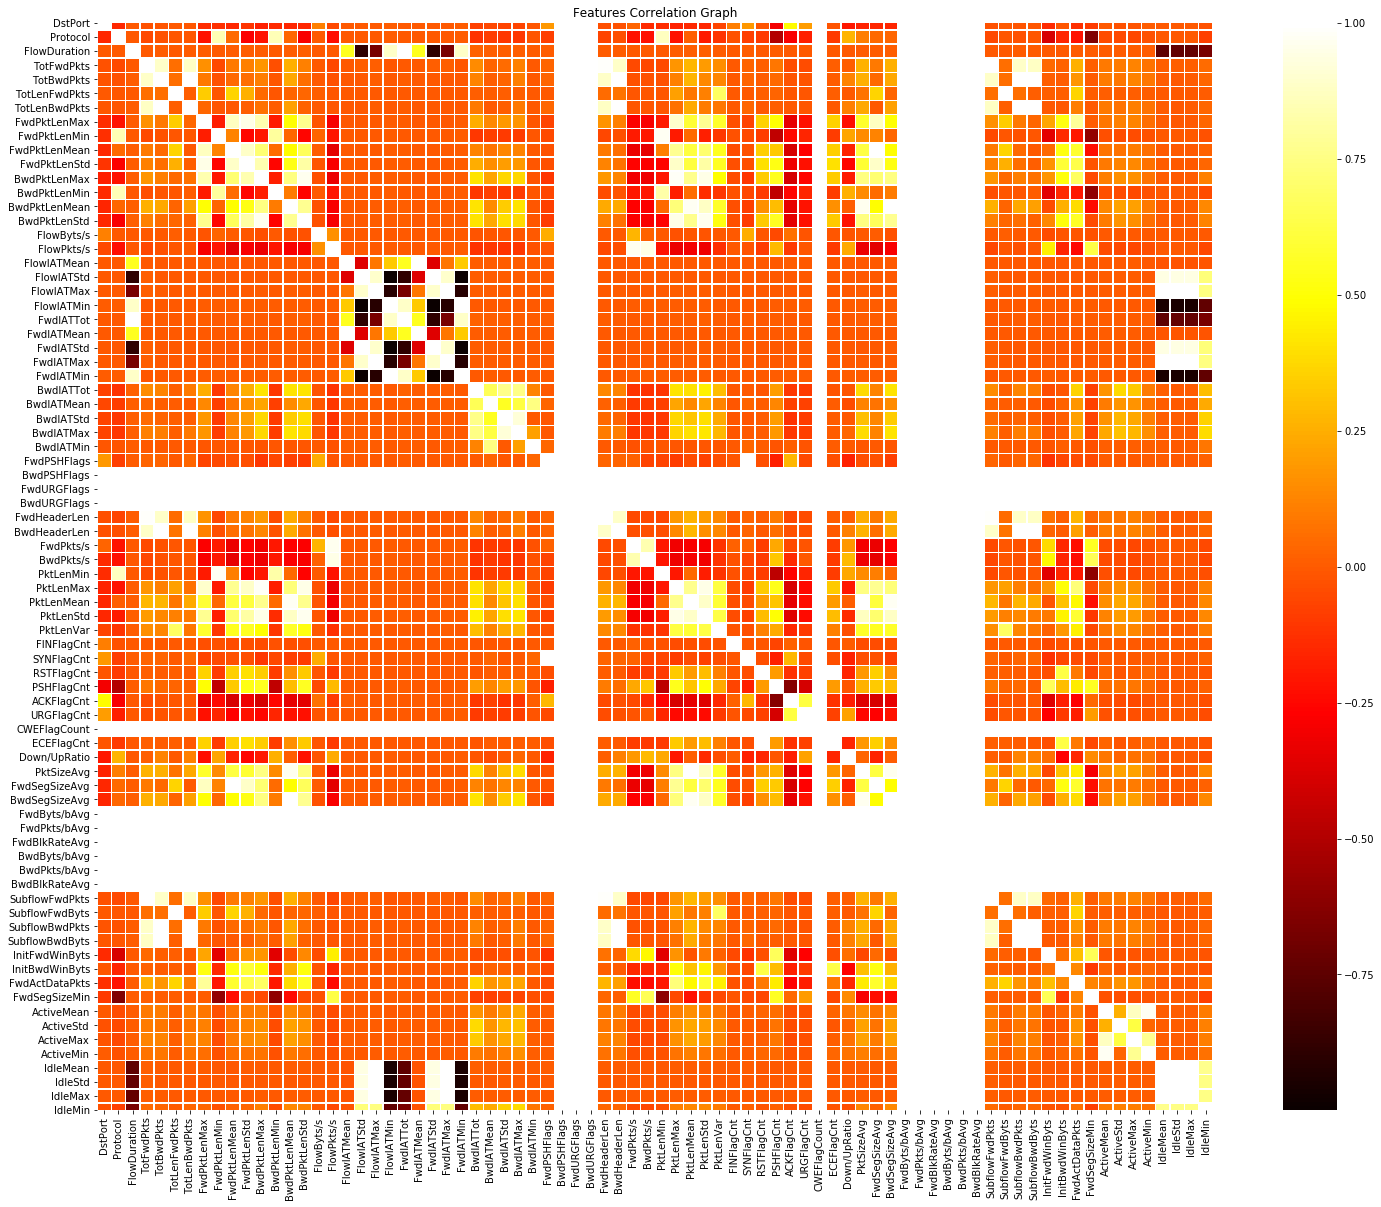

In [ ]:
#Student 1 Lakshmi Soundarya Chakka and u2301563
#Analytical method 1: here finding features correlation using sns heat map graph. Heat map shows strong color in map if feature is important in the dataset 

dataFrame = pd.DataFrame(IDS_df.toPandas())
featuresCorr = dataFrame.drop(columns=['Label','Timestamp']).corr()
plt.figure(figsize=(25, 20))
sns.heatmap(featuresCorr, xticklabels = featuresCorr.columns, yticklabels = featuresCorr.columns,
            linewidths=.5, cmap='hot')
plt.title("Features Correlation Graph")
plt.show()

In [ ]:
#Student 1 Lakshmi Soundarya Chakka and u2301563
#Analytical method 2: in this method displaying frequent items from dataset

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
features_Convert=['DstPort', 'Protocol', 'FlowDuration', 'TotFwdPkts', 'TotBwdPkts', 'TotLenFwdPkts', 'TotLenBwdPkts',
                  'FwdPktLenMax', 'FwdPktLenMin']
converter = VectorAssembler(inputCols = features_Convert, outputCol = 'newfeatures', handleInvalid = "skip")
new_Data = converter.transform(IDS_df)
labelConverter = StringIndexer(inputCol = "Label", outputCol = "newlabel", handleInvalid = "skip")
new_Data = labelConverter.fit(new_Data).transform(new_Data)
temps = new_Data.freqItems(features_Convert,0.1)
temps = pd.DataFrame(temps.toPandas())
print(temps.to_string())

                                   DstPort_freqItems Protocol_freqItems FlowDuration_freqItems                TotFwdPkts_freqItems               TotBwdPkts_freqItems                               TotLenFwdPkts_freqItems                            TotLenBwdPkts_freqItems                    FwdPktLenMax_freqItems       FwdPktLenMin_freqItems
0  [50409, 445, 53, 80, 22, 443, 3389, 21, 0, 10443]         [17, 6, 0]  [5807256, 2, 1, 7, 6]  [23, 8, 2, 4, 22, 1, 10, 9, 3, 24]  [8, 20, 2, 5, 22, 4, 7, 1, 21, 0]  [1928, 38, 1144, 1138, 97, 1912, 1944, 161, 0, 1148]  [1581, 232, 1727, 2668, 488, 1334, 2665, 1923, 0]  [38, 46, 677, 97, 757, 640, 661, 161, 0]  [50, 40, 37, 45, 42, 51, 0]


In [ ]:
# Student 1 Lakshmi Soundarya Chakka and u2301563
# Analytical method 3:getting schema of IDS data frame table and using Drop to remove DstPort & Protocol.
IDS_df.printSchema()
IDS_dfdrop=IDS_df.drop('DstPort','Protocol')
IDS_dfdrop.printSchema()

root
 |-- DstPort: string (nullable = true)
 |-- Protocol: string (nullable = true)
 |-- Timestamp: string (nullable = true)
 |-- FlowDuration: string (nullable = true)
 |-- TotFwdPkts: string (nullable = true)
 |-- TotBwdPkts: string (nullable = true)
 |-- TotLenFwdPkts: string (nullable = true)
 |-- TotLenBwdPkts: string (nullable = true)
 |-- FwdPktLenMax: string (nullable = true)
 |-- FwdPktLenMin: string (nullable = true)
 |-- FwdPktLenMean: string (nullable = true)
 |-- FwdPktLenStd: string (nullable = true)
 |-- BwdPktLenMax: string (nullable = true)
 |-- BwdPktLenMin: string (nullable = true)
 |-- BwdPktLenMean: string (nullable = true)
 |-- BwdPktLenStd: string (nullable = true)
 |-- FlowByts/s: string (nullable = true)
 |-- FlowPkts/s: string (nullable = true)
 |-- FlowIATMean: string (nullable = true)
 |-- FlowIATStd: string (nullable = true)
 |-- FlowIATMax: string (nullable = true)
 |-- FlowIATMin: string (nullable = true)
 |-- FwdIATTot: string (nullable = true)
 |-- FwdI

In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
# Analytical method 1:: Hypothesis testing finding importance of attribute using Hypothesis testing

selectedFeatures = ['Protocol', 'RSTFlagCnt', 'PSHFlagCnt', 'ACKFlagCnt', 'URGFlagCnt', 'CWEFlagCount', 'ECEFlagCnt']
assemblers = VectorAssembler(inputCols = selectedFeatures, outputCol = 'tempfeatures', handleInvalid = "skip")
tempData = assemblers.transform(IDS_df)
indexers = StringIndexer(inputCol = "Label", outputCol = "templabel", handleInvalid = "skip")
tempData = indexers.fit(tempData).transform(tempData)
chi = ChiSquareTest.test(tempData, 'tempfeatures', 'templabel').head()
print("pValues : " + str(chi.pValues))
print("degrees Of Freedom : " + str(chi.degreesOfFreedom))
print("Attribute Statistics : " + str(chi.statistics))

pValues : [0.0,0.0,0.0,0.0,0.0,1.0,0.0]
degrees Of Freedom : [4, 2, 2, 2, 2, 0, 2]
Attribute Statistics : [158193.27273895635,24673.13706401792,220632.16991449206,123459.74047772097,310978.7879904024,0.0,24672.518431587352]


In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
#Analytical method 2: Random Sampling Method randomly generating samples from IDS dataset

new_Data.sample(withReplacement=False,fraction=0.006,seed=42).show()


+-------+--------+-------------------+------------+----------+----------+-------------+-------------+------------+------------+-------------+------------+------------+------------+-------------+------------+----------+----------------+-----------+----------+----------+----------+---------+----------+---------+---------+---------+---------+----------+---------+---------+---------+-----------+-----------+-----------+-----------+------------+------------+----------------+----------------+---------+---------+----------+---------+---------+----------+----------+----------+----------+----------+----------+------------+----------+------------+----------+-------------+-------------+------------+------------+-------------+------------+------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+----------+---------+---------+---------+--------+-------+-------+-------+--------------+--------------------+--------

In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
# Analytical method 3: Counting all rows using analytical summary option

from pyspark.ml.stat import Summarizer
summary = Summarizer.metrics("count")
summaryDetails = new_Data.select(summary.summary(new_Data.newfeatures))
for rows_data in summaryDetails.rdd.collect():
    row = rows_data.asDict().get('aggregate_metrics(newfeatures, 1.0)')
    counts = row.asDict().get('count')
print("Total Rows : "+str(counts))

Total Rows : 1048575


In [ ]:
#Student 3 :Sainath Linga and u2334500
#Analytical method 1: Calculating mean and count of features with label

summary = Summarizer.metrics("mean", "count")
new_Data.select(summary.summary(new_Data.newfeatures, new_Data.newlabel)).show(truncate=False)


+--------------------------------------------------------------------------------------------------------------------------------------------------+
|aggregate_metrics(newfeatures, newlabel)                                                                                                          |
+--------------------------------------------------------------------------------------------------------------------------------------------------+
|{[21.65979406829446,6.0,120993.67600758585,8.076533142903367,7.700153727631468,638.336899204631,879.5128909589156,211.22078031723473,0.0], 380949}|
+--------------------------------------------------------------------------------------------------------------------------------------------------+



In [ ]:
# Student 3: Sainath Linga and u2334500
# Analytical method 2: Calculating variance and Standard Deviation 
from pyspark.sql.functions import *
IDS_df.select(variance('IdleStd'),stddev('IdleStd'),stddev_pop('IdleMin'),stddev_samp('IdleMax')).show()

+--------------------+--------------------+-------------------+--------------------+
|   var_samp(IdleStd)|stddev_samp(IdleStd)|stddev_pop(IdleMin)|stddev_samp(IdleMax)|
+--------------------+--------------------+-------------------+--------------------+
|6.330161996905233...| 2.515981318870479E8| 9.31993869584467E7| 9.298528373349414E8|
+--------------------+--------------------+-------------------+--------------------+



In [ ]:
# Student 3 Sainath Linga and u2334500
# Analytical method 3: Analytical method to change the datatype and finding the covariance. 
from pyspark.ml.stat import *
IDS_df = IDS_df.withColumn("DstPort", 
                                  IDS_df["DstPort"]
                                  .cast('integer'))
IDS_df = IDS_df.withColumn("Protocol", 
                                  IDS_df["Protocol"]
                                  .cast('integer'))
IDS_df.stat.cov('DstPort','Protocol')

-21696.60362073932

In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Analytical method 1: Analytical method to calculate alone mean with only features without label 

new_Data.select(Summarizer.mean(new_Data.newfeatures)).show(truncate=False)



+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean(newfeatures)                                                                                                                                                     |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[4876.261774312782,8.107557399327671,6255554.608775791,6.2066223207686795,7.211191378775841,447.99364280094824,4521.803392222791,174.57359273299545,8.389535321746209]|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------+



In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Analytical method 2: finding distinct rows from dataset

data = IDS_df.distinct()
data = pd.DataFrame(data.toPandas())
print(data.head())

   DstPort  Protocol            Timestamp  FlowDuration  TotFwdPkts  \
0       21         6  14/02/2018 11:30:50             0           1   
1       21         6  14/02/2018 11:47:43             0           1   
2        0         0  14/02/2018 08:31:36           182           1   
3        0         0  14/02/2018 09:56:58           148           1   
4        0         0  14/02/2018 11:23:04           148           1   

   TotBwdPkts  TotLenFwdPkts  TotLenBwdPkts  FwdPktLenMax  FwdPktLenMin  ...  \
0           1              0              0             0             0  ...   
1           1              0              0             0             0  ...   
2           1              0              0             0             0  ...   
3           1              0              0             0             0  ...   
4           1              0              0             0             0  ...   

   FwdSegSizeMin  ActiveMean  ActiveStd  ActiveMax  ActiveMin  IdleMean  \
0             40 

In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Analytical method 3: Analytical CROSSTAB method to find different protocols undergoes number of different attacks

data = IDS_df.stat.crosstab("Protocol", "Label")
data = data.filter(data.Benign > 0)
data.show()

+--------------+------+--------------+--------------+
|Protocol_Label|Benign|FTP-BruteForce|SSH-Bruteforce|
+--------------+------+--------------+--------------+
|            17|207384|             0|             0|
|             6|448360|        193360|        187589|
|             0| 11882|             0|             0|
+--------------+------+--------------+--------------+




# **Task 2 - Part2: PySpark [15 marks]**

---


In [ ]:
# Student 1 Lakshmi Soundarya Chakka and u2301563
# Machine Learning Technique:Random Forest
# What to achieve:
(Xtrain, Xtest) = new_Data.randomSplit([0.8, 0.2])
rf = RandomForestClassifier(numTrees=70,
                            maxDepth=3, 
                            labelCol='newlabel',
                            seed=42)
rf.setFeaturesCol("newfeatures")
nbModel = rf.fit(Xtrain)
nbPredict = nbModel.transform(Xtest)
correctLabel = nbPredict.select(['newlabel']).collect()
predictedLabel = nbPredict.select(['prediction']).collect()

evaluate = MulticlassClassificationEvaluator(labelCol='newlabel',metricName="accuracy")
print("---------------------------------------------------------------------------")
print("Random Forest Prediction Accuracy = "+str(evaluate.evaluate(nbPredict)))
print("---------------------------------------------------------------------------\n")
print("---------------------------------------------------------------------------")
print('Classification Report (Random Forest)')
print("---------------------------------------------------------------------------")

precisions = precision_score(correctLabel,predictedLabel,average='macro')
recalls = recall_score(correctLabel,predictedLabel,average='macro')
fmeasures = f1_score(correctLabel,predictedLabel,average='macro') 
print("Random Forest Precision : "+str(precisions))
print("Random Forest Perceptron Recall : "+str(recalls))
print("Random Forest Perceptron FScore : "+str(fmeasures))


---------------------------------------------------------------------------
Random Forest Prediction Accuracy = 0.9995047383208724
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Classification Report (Random Forest)
---------------------------------------------------------------------------
Random Forest Precision : 0.999697949372806
Random Forest Perceptron Recall : 0.9990874053855605
Random Forest Perceptron FScore : 0.9993921132255346


Silhouette Euclidean Distance = -0.8193220394443123
Cluster Centers: 
[array([ 5.26893437e+03,  8.35853339e+00, -1.72679356e+06,  4.69035373e+00,
        4.27587271e+00,  3.96115161e+02,  9.49453580e+02,  1.61630010e+02,
        9.09481239e+00]), array([8.13428435e+02, 5.51080476e+00, 8.88458611e+07, 2.18948741e+01,
       3.75818121e+01, 9.84760467e+02, 4.14835419e+04, 3.08495893e+02,
       1.09230303e+00])]


/usr/local/lib/python3.8/dist-packages/pyspark/ml/clustering.py:974: FutureWarning: Deprecated in 3.0.0. It will be removed in future versions. Use ClusteringEvaluator instead. You can also get the cost on the training dataset in the summary.
  warnings.warn(


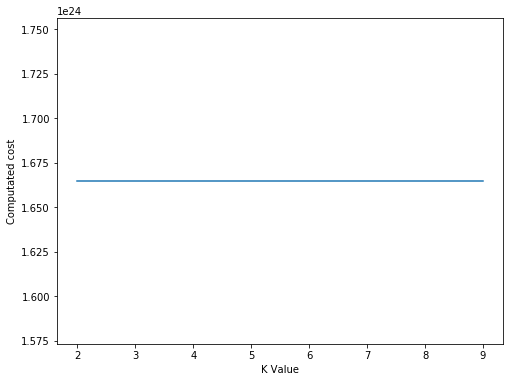

In [ ]:
# Student 2 Ganesh Raj Lingumgunta and u2278208
# Machine Learning Technique: Bisecting Kmeans clustering
# What to achieve:
temp = new_Data
temp = temp.withColumnRenamed("newfeatures","features")
bisectingKmeans = BisectingKMeans()
bisectingKmeans.setK(2)
bisectingKmeans.setSeed(1)
bisectModel = bisectingKmeans.fit(temp)

bisectPredict = bisectModel.transform(temp)
clusterEvaluator = ClusteringEvaluator()
silhouetteDistance = clusterEvaluator.evaluate(bisectPredict)
print("Silhouette Euclidean Distance = " + str(silhouetteDistance))
print("Cluster Centers: ")
clusterCenters = bisectModel.clusterCenters()
print(clusterCenters)
computeCost = np.zeros(10)
for i in range(2,10):
    model = bisectingKmeans.fit(temp.sample(True,0.01,seed=0))
    computeCost[i] = model.computeCost(temp)
figure,axis = plt.subplots(1,1,figsize =(8,6))
axis.plot(range(2,10),computeCost[2:10])
axis.set_xlabel('K Value')
axis.set_ylabel('Computated cost')
plt.show()


In [ ]:
# Student 3 Sainath Linga and u2334500
# Machine Learning Technique:linear regression
# What to achieve:
(Xtrain, Xtest) = new_Data.randomSplit([0.8, 0.2])
linearRegression = LinearRegression(elasticNetParam=0.1,maxIter=10,regParam=0.01,featuresCol='newfeatures',labelCol='newlabel')
linearModel = linearRegression.fit(Xtrain)
linearPredict = linearModel.transform(Xtest)
correctLabel = linearPredict.select(['newlabel']).collect()
predictedLabel = linearPredict.select(['prediction']).collect()
mean_error = linearModel.summary
print("---------------------------------------------------------------------------")
print("Linear Regression RMSE : "+str(mean_error.rootMeanSquaredError))
print("Linear Regression RSquared : "+str(mean_error.r2*100))
print("---------------------------------------------------------------------------")


---------------------------------------------------------------------------
Linear Regression RMSE : 0.6973246256327764
Linear Regression RSquared : 19.705514270505788
---------------------------------------------------------------------------


In [ ]:
# Student 4 Guru Venkata Pavan Kumar Sabniveesu and u2266286
# Machine Learning Technique:Decision Tree Regression Algorithnm
# What to achieve:
(Xtrain, Xtest) = new_Data.randomSplit([0.8, 0.2])
treeRegression = DecisionTreeRegressor(featuresCol='newfeatures',labelCol='newlabel')
dtModel = treeRegression.fit(Xtrain)
dtPredict = dtModel.transform(Xtest)
treeEvaluator = RegressionEvaluator(labelCol="newlabel",predictionCol="prediction",metricName="rmse")
error = treeEvaluator.evaluate(dtPredict)
print("---------------------------------------------------------------------------")
print("Decision Tree Regression RMSE : "+str(error))
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Decision Tree Regression RMSE : 0.01025156381679082
---------------------------------------------------------------------------


# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
!pip3 install nbconvert


# convert ipynb to html
# file name: "Your_Group_ID_CN7031.ipynb
!jupyter nbconvert --to html 103_CN7031.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook 103_CN7031.ipynb to html
/usr/local/lib/python3.8/dist-packages/nbconvert/filters/datatypefilter.py:39: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn("Your element with mimetype(s) {mimetypes}"
[NbConvertApp] Writing 820270 bytes to 103_CN7031.html
